## Fruits Classifier using KNN and Decision Tree

In [61]:
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import cm
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error as mse
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #to plot the decision tree
import graphviz #to plot tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
fruits_data = pd.read_table('fruits.txt')
fruits_data.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [3]:
# no.of samples and features
fruits_data.shape

(59, 7)

In [4]:
#categories
print(fruits_data['fruit_name'].unique())
print(fruits_data.groupby('fruit_name').size())

['apple' 'mandarin' 'orange' 'lemon']
fruit_name
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


## VISUALISATION OF FEATURES

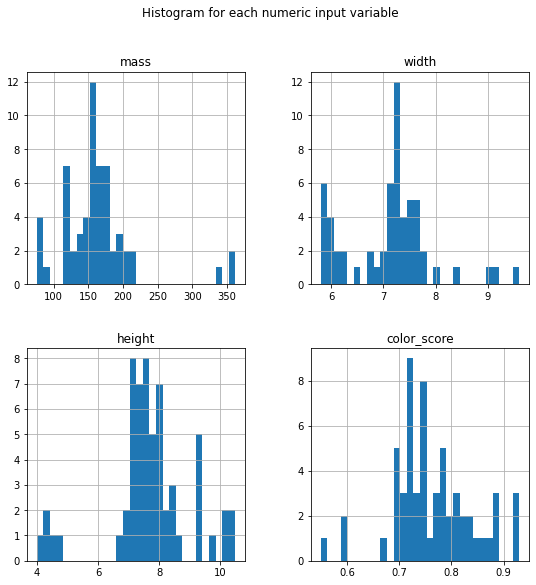

In [5]:
fruits_data.drop('fruit_label', axis = 1).hist(bins=30, figsize = (9,9))
pl.suptitle("Histogram for each numeric input variable")
plt.show()

Text(0.5, 0.98, 'Scatter-matrix for each input variable')

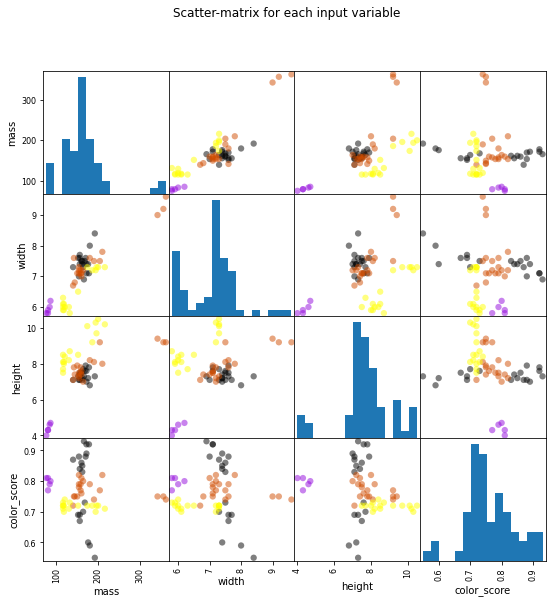

In [6]:
## plotting the scattermatrix of the variables to obtain correlation estimates

features = ['mass', 'width', 'height', 'color_score']
X = fruits_data[features] ## the dataframe
y = fruits_data['fruit_label'] ## target var

cmap = cm.get_cmap('gnuplot')

scatter = pd.plotting.scatter_matrix(X, c = y, marker = 'o', s = 40, hist_kwds = {'bins': 15}, figsize = (9,9), cmap = cmap)
## X = dataframe, c = color?, s = ?, hist_kwds = keywords for histogram, cmap uses the cmap from cm

plt.suptitle('Scatter-matrix for each input variable')

## Statistical summary

In [7]:
fruits_data.describe()

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


as the numerical values are not scaled, scaling has to be applied to the testset

## Training and test dataset division with scaling

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

##using min max scaling to scale data
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

## Using KNN to classify

In [9]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

## knn.score gives the accuracy (total correct/total predicted)

print('Accuracy of K-NN classifier on training set: {:.2f}'.format( knn.score(X_train,y_train)))
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.95
Accuracy of K-NN classifier on training set: 1.00


## Using a Decision Tree

In [10]:
dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)

#finding accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dec.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on training set: {:.2f}'.format(dec.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on training set: 0.73


Even though KNN has a better sccuracy, I'm going to plot a decision tree (because I want to)

## Plotting Decision Tree

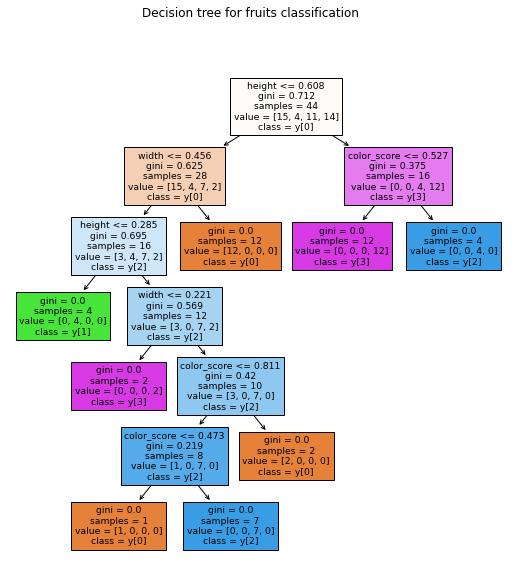

In [58]:
fig = plt.figure(figsize = (9,9))
tree.plot_tree(dec, feature_names = features, class_names = True, filled = True)
plt.suptitle("Decision tree for fruits classification")
plt.show()

## Confusion matrix and classification report

In [64]:
dec = DecisionTreeClassifier()
dec.fit(X_train, y_train)
pred = dec.predict(X_test)
print(confusion_matrix(y_test, pred)) ## we have a 4*4 matrix as we have 4 classes
print(classification_report(y_test, pred)) ## no. of occurances in the class

[[4 0 0 0]
 [0 1 0 0]
 [2 0 4 2]
 [0 0 0 2]]
              precision    recall  f1-score   support

           1       0.67      1.00      0.80         4
           2       1.00      1.00      1.00         1
           3       1.00      0.50      0.67         8
           4       0.50      1.00      0.67         2

    accuracy                           0.73        15
   macro avg       0.79      0.88      0.78        15
weighted avg       0.84      0.73      0.72        15

